# Feature Engineering: Box-Cox Power Transformation

**What is a transformation?** A transformation is a process that alters each data point in a certain column in a systematic way that makes it cleaner for a model to use. For instance, that could mean squaring each value, or maybe taking the square root of each value in a given column.

So let's say a distribution for a certain feature has a long right tail. Then the transformation would aim to pull that tail in to make it a more compact distribution using a log transformation.

We do this so that the model doesn't get distracted trying to chase down outliers in that tail.

### Read in text

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create the two new features

In [2]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Plot the two new features

In [3]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

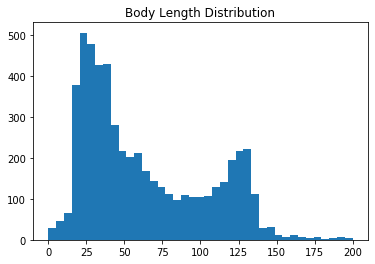

In [4]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

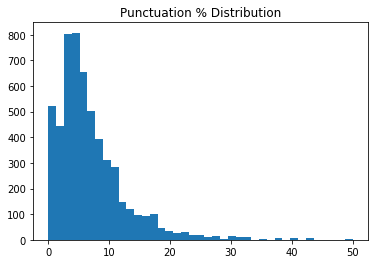

In [5]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

### Transform the punctuation % feature

### Box-Cox Power Transformation

The series of transformation that we'll be working with are call the Box-Cox Power Transformations. This is a very common type of transformation. The base form of this type of transformation is y to the x power, where y is the value in an individual cell, and the x is the exponent of the power transformation you're applying. 

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test. Commonly used range [-2, 2]
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

So what we want to do is apply a bunch of different power transformations and pick the histogram that looks the most like a normal distribution. 

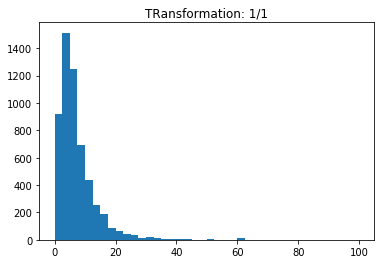

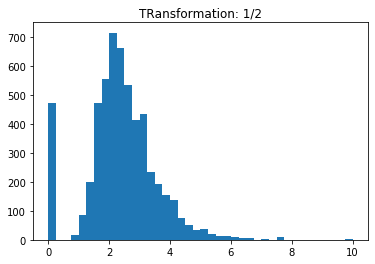

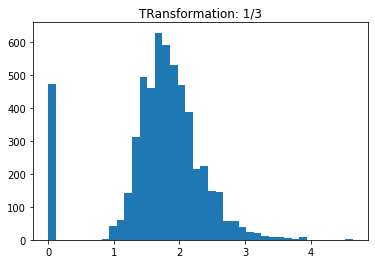

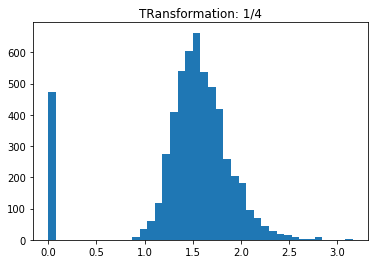

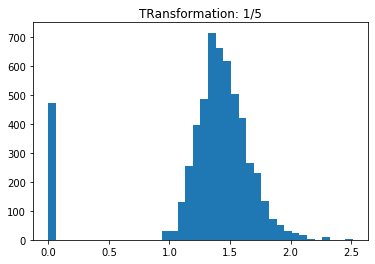

In [6]:
for i in [1,2,3,4,5]:
    pyplot.hist((data['punct%'])**(1/i), bins = 40)
    pyplot.title("TRansformation: 1/{}".format(str(i)))
    pyplot.show()

Now for the first loop through you'll see that this is the exact distribution that we saw before. Now as we move to the next one, the square root transformation, or exponent of one half, you can see it's kind of starting to pull this tail in. You can see how much the scale has changed and you see it looks a little bit nicer, a little bit more compact, a little bit more like a normal distribution. 

Then you go to one third, it's even more so. More compact, more like a normal distribution. One fourth is a little bit better and then one fifth is even better. Again you'll notice that the outliers continue to get pulled in closer and closer to the center of the distribution. 

So given this view I would probably choose a transformation to be either one fourth or one fifth. Both of those look pretty good. The stack to the left is just zeros, so this means that there's no punctuation. So any power transformation of zero is just going to keep it at zero so we'll maintain that stack on the left.

What we're mostly concerned about is the rest of the distribution seeing how the transformation effects that. So these power transformations are a commonly used method to transformation skewed data or data that isn't behaving particularly well. It helps your model key in on the data and leverage it to make predictions in a cleaner way. 